# Dataset Information
This dataset allows you to study, analyze and recognize elements in the images. That’s exactly how your camera detects your face, using image recognition! It’s a digit recognition problem. This data set has 49,000 images of 28 X 28 size, totalling 49 MB.

# Import Modules

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

2024-03-24 12:12:05.281057: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 12:12:05.281147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 12:12:05.447054: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Unzip the train data

In [2]:
# !unzip Train_UQcUa52.zip 

In [3]:
df = pd.read_csv('/kaggle/input/mnist-hand-digit/train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [4]:
!pwd

/kaggle/working


In [5]:
image_path = '/kaggle/input/mnist-hand-digit/Images/train/'

In [6]:
import numpy as np
from tqdm import tqdm
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array

# Assuming df is your DataFrame containing filenames
image_paths = [image_path + filename for filename in df['filename']]

# Function to load and preprocess image
def preprocess_image(image_path):
    # Load image
    img = Image.open(image_path)
    # Convert to grayscale
    img = img.convert('L')
    # Resize to target size
    img = img.resize((28, 28))
    # Convert to numpy array
    img_array = img_to_array(img)
    return img_array

# Load and preprocess images
X = np.array([preprocess_image(image_path) for image_path in tqdm(image_paths)])
X = X.astype('float32')


100%|██████████| 49000/49000 [03:31<00:00, 231.57it/s]


In [7]:
y = df['label']

In [8]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


# Exploratory Data Analysis

4


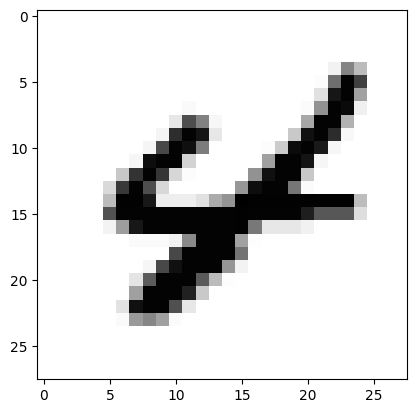

In [9]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

2


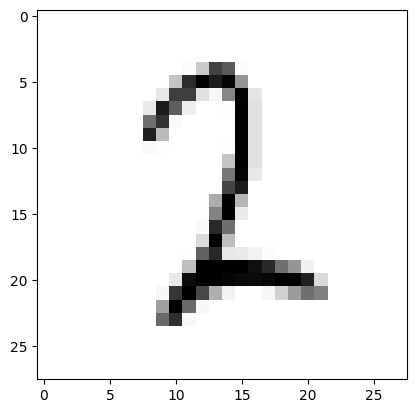

In [10]:
image_index = 10
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

7


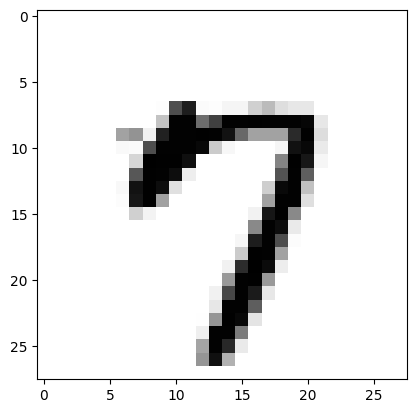

In [11]:
image_index = 100
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

# Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))


# Normalization

In [13]:
x_train /= 255
x_test /= 255

# Model Creation

In [14]:
input_shape = (28,28,1)
output_class = 10

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Define input shape
input_shape = (28, 28, 1)  # Assuming your input images are grayscale with size 28x28

# Define the number of output classes
output_class = 10  # Change this according to your problem

# Define the model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# train the model

In [16]:
# train the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
  85/1149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6205 - loss: 1.2154

I0000 00:00:1711282562.918247      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711282562.935842      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1149/1149 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8590 - loss: 0.4629

W0000 00:00:1711282567.478725      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711282568.173368      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1149/1149 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8591 - loss: 0.4627 - val_accuracy: 0.9659 - val_loss: 0.1141
Epoch 2/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9635 - loss: 0.1264 - val_accuracy: 0.9750 - val_loss: 0.0822
Epoch 3/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9733 - loss: 0.0808 - val_accuracy: 0.9771 - val_loss: 0.0737
Epoch 4/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9791 - loss: 0.0625 - val_accuracy: 0.9795 - val_loss: 0.0682
Epoch 5/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9854 - loss: 0.0462 - val_accuracy: 0.9802 - val_loss: 0.0684
Epoch 6/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9880 - loss: 0.0385 - val_accuracy: 0.9819 - val_loss: 0.0648
Epoch 7/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9895 - loss: 0.0313 - val_accuracy: 0.9797 - val_loss: 0.0750
Epoch 8/30
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9892 - loss: 0.0322 - val_accura

# Testing the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
Predicted output: 1


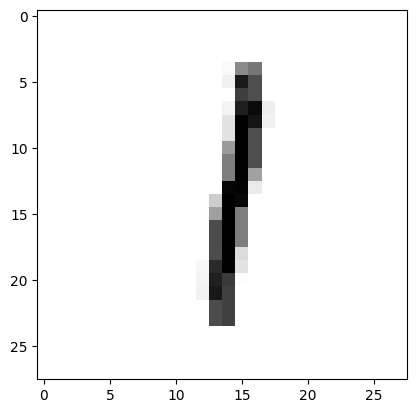

In [17]:
image_index = 10
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted output: 9


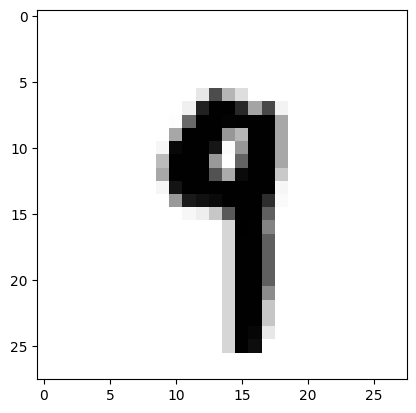

In [18]:
image_index = 50
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())